# Capstone Project - The Battle of Neighborhoods

In this project I will use location data to explore a geographical location, and use Data Science technique like Clustering and Visualization to solve the problem I defined below.

## Problem

In this project I will answer one question: 'Where is the proper location to open a restaurant in Delhi?'

## Data

Main data is from two sources:

1. List of districts and neighborhoods in Delhi from Wikipedia (https://en.wikipedia.org/wiki/Neighbourhoods_of_Delhi)
2. Foursquare

## Prepare data

Firstly, load necessary libraries.

In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

C:\Users\YASH HARSH\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Libraries imported.


The list of districts and neighborhoods in Delhi is from [Wikipedia](https://en.wikipedia.org/wiki/Neighbourhoods_of_Delhi), and the coordinates data is from [https://www.maps.ie/coordinates.html](https://www.maps.ie/coordinates.html). 

I create the `.csv` file manually.

Let's load and explore it.

In [3]:
link='https://raw.githubusercontent.com/Disp101/Coursera_Capstone/master/delhi.csv'
df = pd.read_csv(link,index_col=0)
df.head()

,Neighborhood,City,Latitude,Longitude
0,Adarsh Nagar,Delhi,28.720341,77.172661
1,Ashok Vihar,Delhi,28.690420,77.176064
2,Azadpur,Delhi,28.712420,77.173111
3,Bawana,Delhi,28.797661,77.045258
4,Begum Pur,Delhi,28.732599,77.052170


__Use geopy library to get the latitude and longitude values of Delhi, India___

In [4]:
address = 'Delhi , India'

geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.


__Create a map of Delhi to visualize the neighbourhoods__

In [5]:
# create map of Delhi using latitude and longitude values
map_delhi = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)  
    
map_delhi

__Utilizing the Foursquare API to explore the neighborhoods and segment them__

In [6]:
# Define Foursquare Credentials and Version
LIMIT = 150

CLIENT_ID = 'ZK40VO3EPO1ZY5C04PNYSMQH2ZFZ3U1TPL0QME3WEY553DMH' # your Foursquare ID
CLIENT_SECRET = 'RQBRNE2T3OTMYY4BBJ3YWLS0P2FK413O22MQV1QHBHAD04WG' # your Foursquare Secret
VERSION = '20180606' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print('VERSION:' + VERSION)

Your credentails:
CLIENT_ID: ZK40VO3EPO1ZY5C04PNYSMQH2ZFZ3U1TPL0QME3WEY553DMH
CLIENT_SECRET:RQBRNE2T3OTMYY4BBJ3YWLS0P2FK413O22MQV1QHBHAD04WG
VERSION:20180606


# __Explore Neighborhoods in Delhi__

__Let's create a function to repeat the same process to all the neighborhoods in Delhi__

In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

__Now write the code to run the above function on each neighborhood and create a new dataframe called delhi_venues__

In [8]:
delhi_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )



Adarsh Nagar
Ashok Vihar
Azadpur
Bawana
Begum Pur
Dhaka
Jahangirpuri
Karala
Keshav Puram
Kingsway Camp
Kohat Enclave
Model Town
Narela
Pitam Pura
Rani Bagh
Rithala
Rohini Sub City
Shalimar Bagh
Shakti Nagar
Bara Hindu Rao
Chandni Chowk
Chawri Bazaar
Civil Lines
Dariba Kalan
Ghantewala
Gulabi Bagh
Kamla Nagar
Kashmiri Gate
Kotwali
Lahori Gate
Nehru Vihar
Paharganj
Pratap Nagar
Pul Bangash
Roshanara Bagh
Sadar Bazaar
Sangam Vihar
Sant Nagar
Sarai Kale Khan
Sarai Rohilla
Shakti Nagar
Shastri Nagar
Tees Hazari
Timarpur
Wazirabad
Babarpur
Dilshad Garden
Kabir Nagar
Mandoli
Maujpur
Nand Nagri
Naveen Shahdara
New Usmanpur
Sadatpur
Shahdara
Sonia Vihar
Shastri Park
Yamuna Vihar
Chandni Chowk
Daryaganj
Jhandewalan
Karol Bagh
Bara Hindu Rao
Paharganj
Rajender Nagar
Sadar Bazaar
Barakhamba Road
Chanakyapuri
Connaught Place
Gautampuri
Gole Market
Golf Links
INA Colony
Khan Market
Laxmibai Nagar
Pragati Maidan
Brij Puri
East Vinod Nagar
Gandhi Nagar
Geeta Colony
Jhilmil Colony
Krishna Nagar
Laxmi N

__Glimspe of the new data set__

In [9]:
print(delhi_venues.shape)
delhi_venues.head()

(1192, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adarsh Nagar,28.720341,77.172661,Giani's,28.717900,77.173907,Ice Cream Shop
1,Adarsh Nagar,28.720341,77.172661,My Idea Store,28.717487,77.170922,Mobile Phone Shop
2,Adarsh Nagar,28.720341,77.172661,Axis Bank ATM,28.722080,77.168740,ATM
3,Adarsh Nagar,28.720341,77.172661,Adarsh Nagar Metro Station,28.716598,77.170436,Light Rail Station
4,Adarsh Nagar,28.720341,77.172661,K.C Food Zone,28.718279,77.176971,Snack Place


__Let's check how many venues were returned for each neighborhood__

In [10]:
delhi_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adarsh Nagar,5,5,5,5,5,5
Alaknanda,5,5,5,5,5,5
Anand Vihar,1,1,1,1,1,1
Ashok Nagar,5,5,5,5,5,5
Ashok Vihar,5,5,5,5,5,5
Azadpur,4,4,4,4,4,4
Babarpur,3,3,3,3,3,3
Badarpur,4,4,4,4,4,4
Bali Nagar,12,12,12,12,12,12


In [11]:
delhi_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       139
Café                     56
Hotel                    53
Fast Food Restaurant     50
Coffee Shop              48
Market                   44
Pizza Place              35
ATM                      33
Light Rail Station       29
Bar                      26
Name: Neighborhood, dtype: int64

__Let's find out how many unique categories can be curated from all the returned venues__

In [12]:
print('There are {} uniques categories.'.format(len(delhi_venues['Venue Category'].unique())))

There are 163 uniques categories.


## Getting number of venues per neighborhood

In [13]:
individual_delhi_venue_count = delhi_venues.groupby(['Neighborhood'])['Venue'].count().to_frame()
individual_delhi_venue_count.head()

,Venue
Neighborhood,
Adarsh Nagar,5
Alaknanda,5
Anand Vihar,1
Ashok Nagar,5
Ashok Vihar,5


In [14]:
individual_delhi_venue_count.rename(columns={'Venue':'NumberOfVenues'},inplace=True)
individual_delhi_venue_count.reset_index(inplace=True)
individual_delhi_venue_count.head()

,Neighborhood,NumberOfVenues
0,Adarsh Nagar,5
1,Alaknanda,5
2,Anand Vihar,1
3,Ashok Nagar,5
4,Ashok Vihar,5


In [15]:
print(individual_delhi_venue_count.loc[individual_delhi_venue_count['NumberOfVenues'].idxmax()])
print(individual_delhi_venue_count.loc[individual_delhi_venue_count['NumberOfVenues'].idxmin()])

Neighborhood      Connaught Place
NumberOfVenues                 69
Name: 16, dtype: object
Neighborhood      Anand Vihar
NumberOfVenues              1
Name: 2, dtype: object


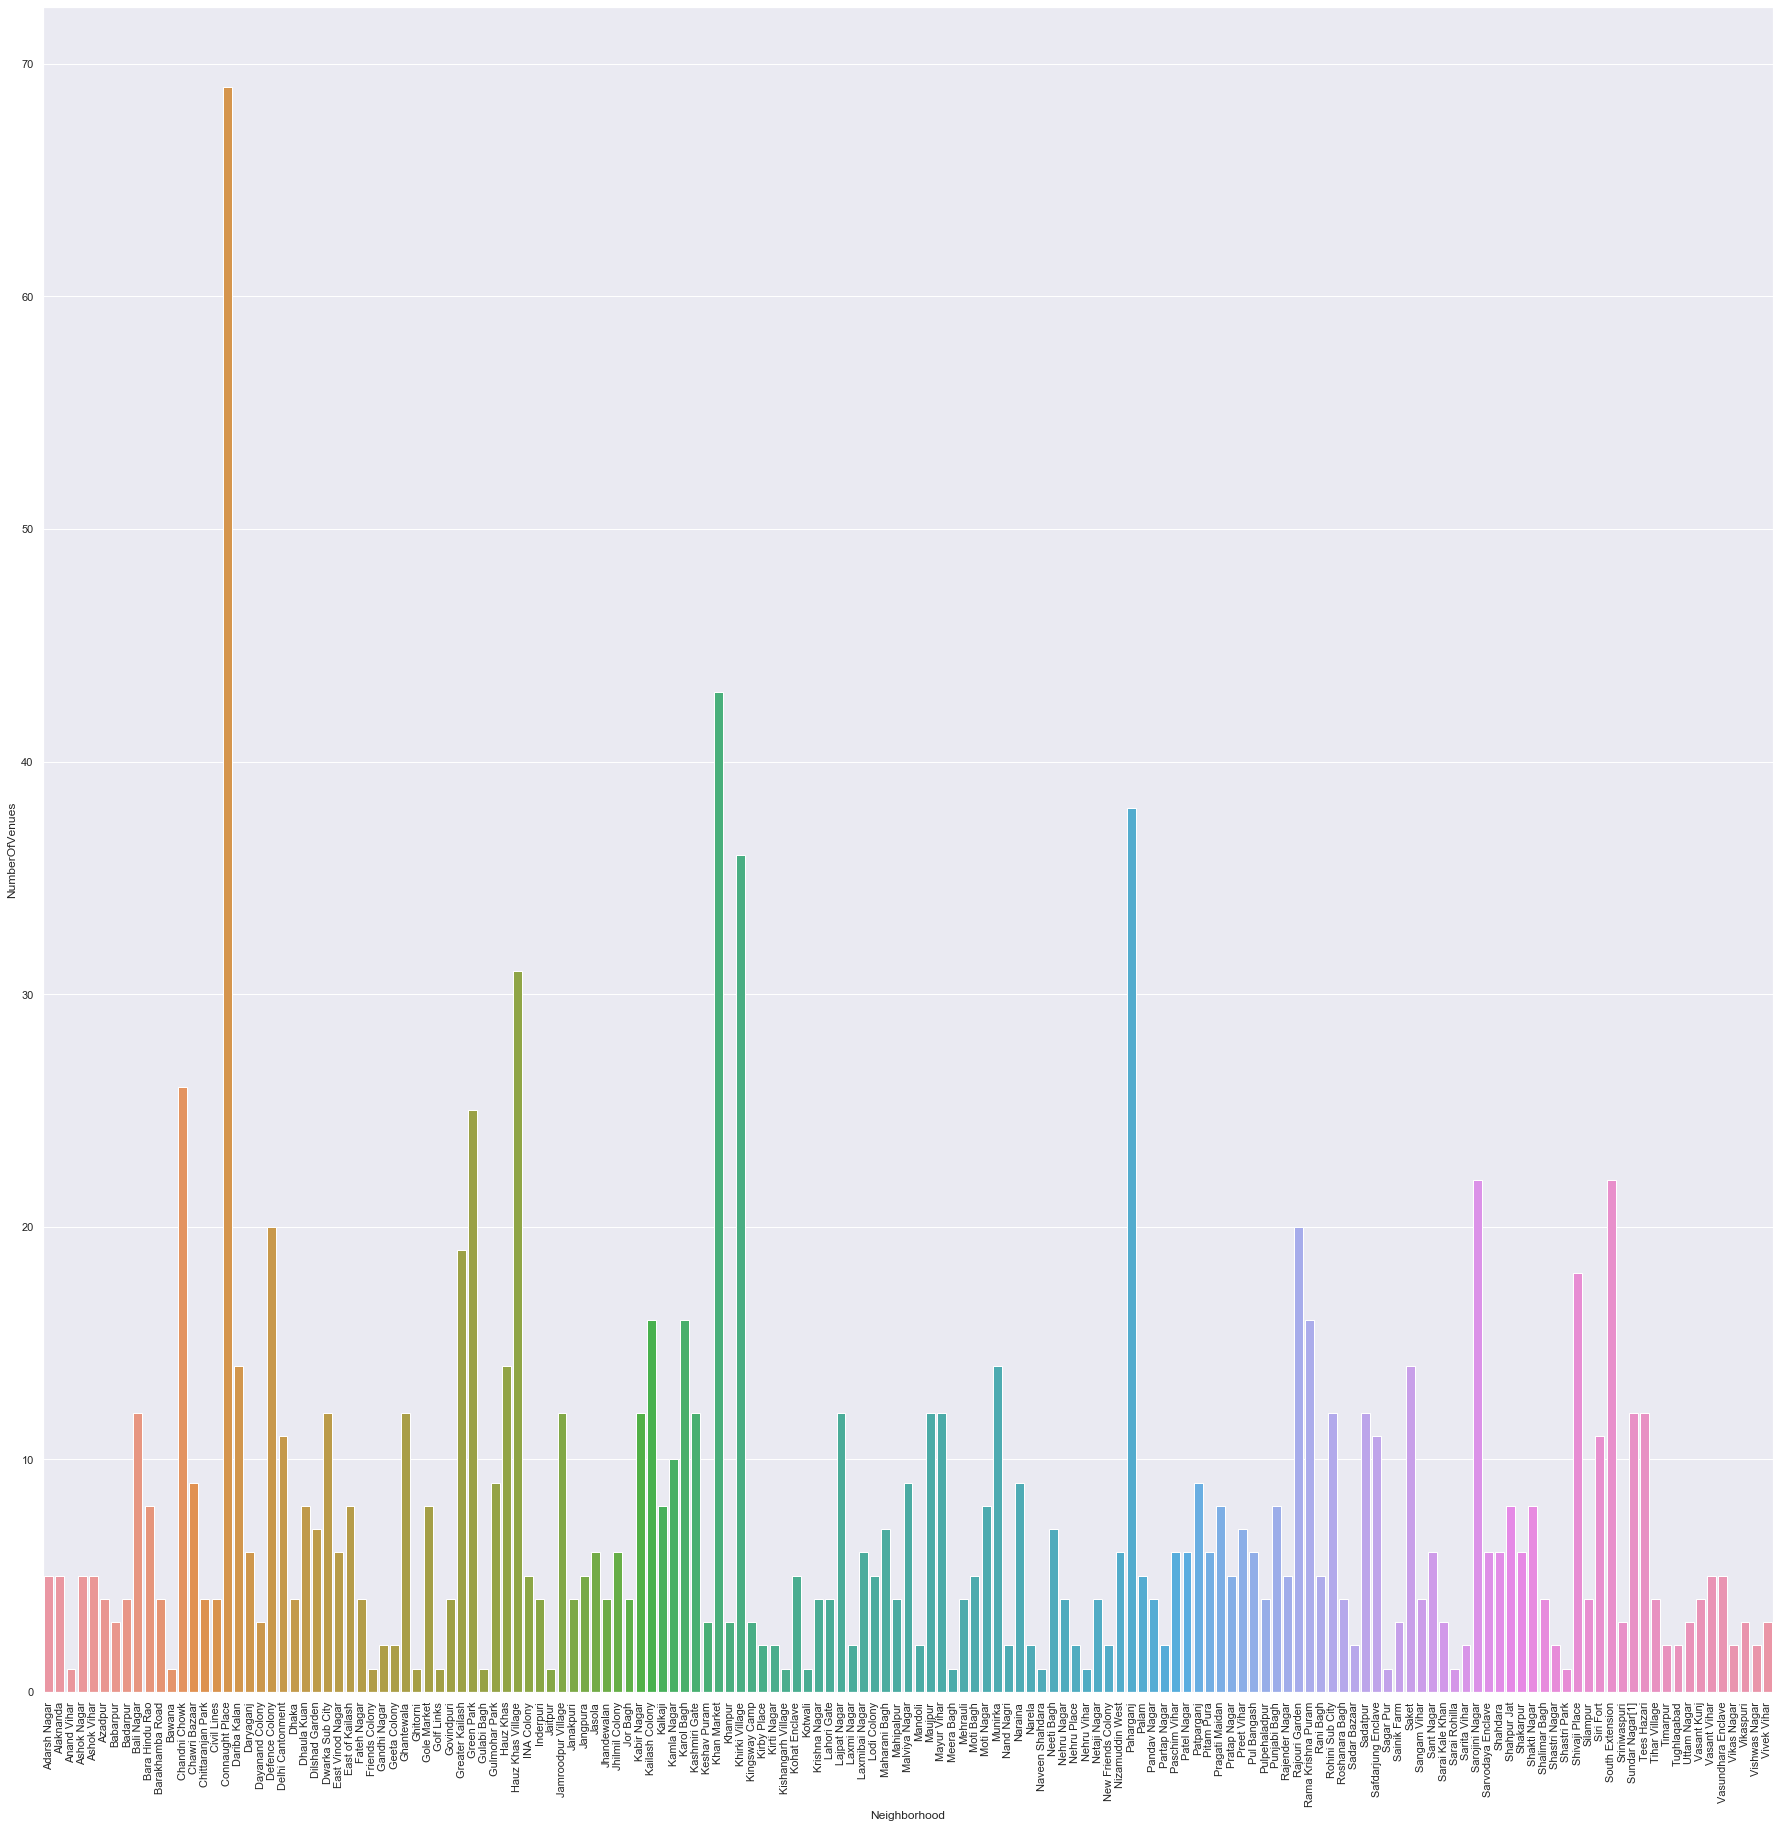

In [34]:
sns.set(rc={'figure.figsize':(31,31)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_delhi_venue_count)
plot.set_xticklabels(individual_delhi_venue_count['Neighborhood'],rotation=90);

##  Analyze Each Neighborhood

In [17]:
# one hot encoding
delhi_onehot = pd.get_dummies(delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
delhi_onehot['Neighborhood'] = delhi_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [delhi_onehot.columns[-1]] + list(delhi_onehot.columns[:-1])
toronto_onehot = delhi_onehot[fixed_columns]

print(delhi_onehot.shape)
delhi_onehot.head()

(1192, 163)


,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bank,Bar,Bed & Breakfast,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Burmese Restaurant,Bus Station,Business Service,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Fabric Shop,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hindu Temple,Historic Site,History Museum,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lawyer,Light Rail Station,Lighting Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,North Indian Restaurant,Northeast Indian Restaurant,Nudist Beach,Other Great Outdoors,Other Nightlife,Park,Parsi Restaurant,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Recreation Center,Rest Area,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Supplement Shop,Tea Room,Temple,Thai Restaurant,Theater,Tourist Information Center,Trail,Train Station,University,Vegetarian / Vegan Restaurant,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


__Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category__

In [18]:
delhi_grouped = delhi_onehot.groupby('Neighborhood').mean().reset_index()

print(delhi_grouped.shape)
delhi_grouped.head()

(155, 163)


,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bank,Bar,Bed & Breakfast,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Burmese Restaurant,Bus Station,Business Service,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Fabric Shop,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hindu Temple,Historic Site,History Museum,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lawyer,Light Rail Station,Lighting Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,New American Restaurant,Nightclub,North Indian Restaurant,Northeast Indian Restaurant,Nudist Beach,Other Great Outdoors,Other Nightlife,Park,Parsi Restaurant,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Recreation Center,Rest Area,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Supplement Shop,Tea Room,Temple,Thai Restaurant,Theater,Tourist Information Center,Trail,Train Station,University,Vegetarian / Vegan Restaurant,Yoga Studio
0,Adarsh Nagar,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alaknanda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Anand Vihar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

__Let's print each neighborhood along with the top 5 most common venues__

In [19]:
num_top_venues = 5

for hood in delhi_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = delhi_grouped[delhi_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adarsh Nagar----
                venue  freq
0                 ATM   0.2
1      Ice Cream Shop   0.2
2   Mobile Phone Shop   0.2
3  Light Rail Station   0.2
4         Snack Place   0.2


----Alaknanda----
                     venue  freq
0        Food & Drink Shop   0.2
1  New American Restaurant   0.2
2                   Market   0.2
3              Coffee Shop   0.2
4               Steakhouse   0.2


----Anand Vihar----
                            venue  freq
0            Gym / Fitness Center   1.0
1                             ATM   0.0
2                           Motel   0.0
3  Multicuisine Indian Restaurant   0.0
4                       Multiplex   0.0


----Ashok Nagar----
                  venue  freq
0  Fast Food Restaurant   0.4
1            Food Court   0.2
2                  Café   0.2
3        Clothing Store   0.2
4                   ATM   0.0


----Ashok Vihar----
                     venue  freq
0              Pizza Place   0.2
1  South Indian Restaurant   0.2
2     Gy

               venue  freq
0  Indian Restaurant  0.17
1             Market  0.08
2     Clothing Store  0.08
3      Jewelry Store  0.08
4                Gym  0.08


----Keshav Puram----
                 venue  freq
0     Department Store  0.33
1               Market  0.33
2  Arts & Crafts Store  0.33
3                  ATM  0.00
4         Nudist Beach  0.00


----Khan Market----
                venue  freq
0                Café  0.19
1         Coffee Shop  0.09
2  Chinese Restaurant  0.07
3                 Bar  0.07
4   Indian Restaurant  0.05


----Khanpur----
                         venue  freq
0                        Trail  0.33
1           Chinese Restaurant  0.33
2                  Men's Store  0.33
3                          ATM  0.00
4  Northeast Indian Restaurant  0.00


----Khirki Village----
               venue  freq
0  Indian Restaurant  0.11
1     Clothing Store  0.11
2             Lounge  0.08
3      Shopping Mall  0.08
4       Burger Joint  0.06


----Kingsway Camp----


                  venue  freq
0     Indian Restaurant  0.27
1  Fast Food Restaurant  0.18
2           Pizza Place  0.09
3          Dessert Shop  0.09
4      Department Store  0.09


----Sarvodaya Enclave----
               venue  freq
0  Indian Restaurant  0.33
1               Café  0.33
2   Parsi Restaurant  0.17
3                Pub  0.17
4                ATM  0.00


----Shahdara----
                     venue  freq
0                      ATM  0.33
1        Electronics Store  0.33
2                Gift Shop  0.33
3              Pizza Place  0.00
4  North Indian Restaurant  0.00


----Shahpur Jat----
                    venue  freq
0                     Bar  0.25
1   Australian Restaurant  0.12
2      Italian Restaurant  0.12
3  Furniture / Home Store  0.12
4      Chinese Restaurant  0.12


----Shakarpur----
                venue  freq
0         Snack Place  0.17
1                 Gym  0.17
2  Light Rail Station  0.17
3   Mobile Phone Shop  0.17
4         Coffee Shop  0.17


----Shakt

__Let's put that into a pandas dataframe__


In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

__Now let's create the new dataframe and display the top 10 venues for each neighborhood__

In [21]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = delhi_grouped['Neighborhood']

for ind in np.arange(delhi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adarsh Nagar,ATM,Light Rail Station,Mobile Phone Shop,Snack Place,Ice Cream Shop,Hotel Bar,Food,Frozen Yogurt Shop,French Restaurant,Food Truck
1,Alaknanda,Steakhouse,Coffee Shop,Food & Drink Shop,New American Restaurant,Market,Yoga Studio,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service
2,Anand Vihar,Gym / Fitness Center,Yoga Studio,Garden,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop
3,Ashok Nagar,Fast Food Restaurant,Café,Food Court,Clothing Store,Yoga Studio,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service
4,Ashok Vihar,Market,Pizza Place,South Indian Restaurant,Gym / Fitness Center,Fast Food Restaurant,Yoga Studio,French Restaurant,Food Truck,Food Service,Food Court


__Find out venues including bus or metro station__

In [22]:
df_station = delhi_venues[delhi_venues['Venue Category'].str.contains('Station$') |
                       delhi_venues['Venue Category'].str.contains('^Bus')]
df_station.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,Adarsh Nagar,28.720341,77.172661,Adarsh Nagar Metro Station,28.716598,77.170436,Light Rail Station
13,Azadpur,28.712420,77.173111,Vishyavidyalaya Metro Station@Entry gate #1 n ...,28.715596,77.170981,Train Station
16,Dhaka,28.708570,77.205711,Gtb Nagar Railway Station,28.707183,77.206757,Train Station
25,Kohat Enclave,28.696560,77.138962,Ominfotec.com,28.696686,77.139773,Business Service
33,Pitam Pura,28.695890,77.137260,Ominfotec.com,28.696686,77.139773,Business Service


__Insert a new column to represents if there is a station nearby__

In [23]:
cols = df_station['Neighborhood'].unique()
indice = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Neighborhood'].isin(cols)].index.values

neighborhoods_venues_sorted['Station'] = 'No'
neighborhoods_venues_sorted.loc[indice, 'Station'] = 'Yes'

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Station
0,Adarsh Nagar,ATM,Light Rail Station,Mobile Phone Shop,Snack Place,Ice Cream Shop,Hotel Bar,Food,Frozen Yogurt Shop,French Restaurant,Food Truck,Yes
1,Alaknanda,Steakhouse,Coffee Shop,Food & Drink Shop,New American Restaurant,Market,Yoga Studio,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,No
2,Anand Vihar,Gym / Fitness Center,Yoga Studio,Garden,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,No
3,Ashok Nagar,Fast Food Restaurant,Café,Food Court,Clothing Store,Yoga Studio,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,No
4,Ashok Vihar,Market,Pizza Place,South Indian Restaurant,Gym / Fitness Center,Fast Food Restaurant,Yoga Studio,French Restaurant,Food Truck,Food Service,Food Court,No


In [24]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Station']=='Yes']

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Station
0,Adarsh Nagar,ATM,Light Rail Station,Mobile Phone Shop,Snack Place,Ice Cream Shop,Hotel Bar,Food,Frozen Yogurt Shop,French Restaurant,Food Truck,Yes
5,Azadpur,ATM,Indian Restaurant,Train Station,Pool Hall,Flower Shop,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Yes
8,Bali Nagar,Light Rail Station,Ice Cream Shop,Pizza Place,Indian Restaurant,Chinese Restaurant,Shoe Store,Dessert Shop,Metro Station,Shopping Mall,History Museum,Yes
9,Bara Hindu Rao,Afghan Restaurant,ATM,Business Service,Food & Drink Shop,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Yes
13,Chawri Bazaar,Indian Restaurant,Light Rail Station,Fast Food Restaurant,Frozen Yogurt Shop,Mosque,Hardware Store,Snack Place,Hostel,Flower Shop,French Restaurant,Yes
22,Dhaka,Furniture / Home Store,Pizza Place,Train Station,Spa,Flower Shop,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Yes
23,Dhaula Kuan,Golf Course,Train Station,Bakery,Burger Joint,Yoga Studio,Food & Drink Shop,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Yes
24,Dilshad Garden,Indian Restaurant,Diner,Market,Metro Station,Flower Shop,Ice Cream Shop,Eastern European Restaurant,Food & Drink Shop,Frozen Yogurt Shop,French Restaurant,Yes
25,Dwarka Sub City,Indian Restaurant,BBQ Joint,Ice Cream Shop,Train Station,Jewelry Store,Food Truck,Cosmetics Shop,Gym,Light Rail Station,Market,Yes
32,Ghantewala,Indian Restaurant,BBQ Joint,Ice Cream Shop,Train Station,Jewelry Store,Food Truck,Cosmetics Shop,Gym,Light Rail Station,Market,Yes


## Cluster Neighborhoods
Run *k*-means to cluster the neighborhood into 5 clusters.

In [25]:
# set number of clusters
kclusters = 5

delhi_grouped_clustering = delhi_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(delhi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 3, 3, 1, 3, 3, 3, 3])

 Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [26]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

delhi_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
delhi_merged = delhi_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood',how='inner')

delhi_merged.head() # check the last columns!

,Neighborhood,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Station
0,Adarsh Nagar,Delhi,28.720341,77.172661,3,ATM,Light Rail Station,Mobile Phone Shop,Snack Place,Ice Cream Shop,Hotel Bar,Food,Frozen Yogurt Shop,French Restaurant,Food Truck,Yes
1,Ashok Vihar,Delhi,28.690420,77.176064,3,Market,Pizza Place,South Indian Restaurant,Gym / Fitness Center,Fast Food Restaurant,Yoga Studio,French Restaurant,Food Truck,Food Service,Food Court,No
2,Azadpur,Delhi,28.712420,77.173111,1,ATM,Indian Restaurant,Train Station,Pool Hall,Flower Shop,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Yes
3,Bawana,Delhi,28.797661,77.045258,0,ATM,Dessert Shop,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,No
5,Dhaka,Delhi,28.708570,77.205711,3,Furniture / Home Store,Pizza Place,Train Station,Spa,Flower Shop,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Yes


Finally, let's visualize the resulting clusters

In [27]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(delhi_merged['Latitude'], delhi_merged['Longitude'], delhi_merged['Neighborhood'], delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters
Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.

Cluster 1

In [28]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 0, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Station
3,Delhi,ATM,Dessert Shop,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,No
12,Delhi,ATM,Dessert Shop,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,No
18,Delhi,ATM,Fast Food Restaurant,Food & Drink Shop,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,No
40,Delhi,ATM,Fast Food Restaurant,Food & Drink Shop,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,No
36,Delhi,ATM,Dessert Shop,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,No
133,Delhi,ATM,Dessert Shop,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,No
50,Delhi,ATM,Smoke Shop,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,No
78,Delhi,ATM,Shipping Store,Furniture / Home Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,No
119,Delhi,ATM,Snack Place,Smoke Shop,Indian Restaurant,Ice Cream Shop,Furniture / Home Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,No
134,Delhi,ATM,Smoke Shop,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,No


Cluster 2 

In [29]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 1, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Station
2,Delhi,ATM,Indian Restaurant,Train Station,Pool Hall,Flower Shop,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Yes
9,Delhi,Playground,Indian Restaurant,Mobile Phone Shop,Flower Shop,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,No
10,Delhi,Snack Place,Food,Indian Restaurant,Hotel,Business Service,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Yes
13,Delhi,Food,Indian Restaurant,Snack Place,Hotel,Convenience Store,Business Service,Yoga Studio,French Restaurant,Food Truck,Food Service,Yes
14,Delhi,Indian Restaurant,Department Store,Fast Food Restaurant,Pizza Place,IT Services,Hotel Bar,French Restaurant,Food Truck,Food Service,Food Court,No
17,Delhi,Restaurant,Indian Restaurant,Cosmetics Shop,Convenience Store,Yoga Studio,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,No
20,Delhi,Indian Restaurant,Snack Place,Market,Fast Food Restaurant,Flea Market,Dessert Shop,Vegetarian / Vegan Restaurant,Hotel,Hot Dog Joint,IT Services,No
58,Delhi,Indian Restaurant,Snack Place,Market,Fast Food Restaurant,Flea Market,Dessert Shop,Vegetarian / Vegan Restaurant,Hotel,Hot Dog Joint,IT Services,No
21,Delhi,Indian Restaurant,Light Rail Station,Fast Food Restaurant,Frozen Yogurt Shop,Mosque,Hardware Store,Snack Place,Hostel,Flower Shop,French Restaurant,Yes
22,Delhi,Fruit & Vegetable Store,Indian Restaurant,Hotel,Food Service,Yoga Studio,Food,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Court,No


Cluster 3

In [30]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 2, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Station
8,Delhi,Department Store,Arts & Crafts Store,Market,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,No
16,Delhi,Indian Restaurant,BBQ Joint,Ice Cream Shop,Train Station,Jewelry Store,Food Truck,Cosmetics Shop,Gym,Light Rail Station,Market,Yes
24,Delhi,Indian Restaurant,BBQ Joint,Ice Cream Shop,Train Station,Jewelry Store,Food Truck,Cosmetics Shop,Gym,Light Rail Station,Market,Yes
25,Delhi,Jewelry Store,Yoga Studio,Food,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,No
27,Delhi,Indian Restaurant,BBQ Joint,Ice Cream Shop,Train Station,Jewelry Store,Food Truck,Cosmetics Shop,Gym,Light Rail Station,Market,Yes
28,Delhi,Market,Yoga Studio,Garden,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,No
32,Delhi,Light Rail Station,Mobile Phone Shop,Train Station,Supplement Shop,Food,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Yes
34,Delhi,Light Rail Station,Train Station,Park,Farmers Market,Flower Shop,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Yes
39,Delhi,Train Station,Yoga Studio,Flower Shop,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,Yes
42,Delhi,Indian Restaurant,BBQ Joint,Ice Cream Shop,Train Station,Jewelry Store,Food Truck,Cosmetics Shop,Gym,Light Rail Station,Market,Yes


Cluster 4

In [31]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 3, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Station
0,Delhi,ATM,Light Rail Station,Mobile Phone Shop,Snack Place,Ice Cream Shop,Hotel Bar,Food,Frozen Yogurt Shop,French Restaurant,Food Truck,Yes
1,Delhi,Market,Pizza Place,South Indian Restaurant,Gym / Fitness Center,Fast Food Restaurant,Yoga Studio,French Restaurant,Food Truck,Food Service,Food Court,No
5,Delhi,Furniture / Home Store,Pizza Place,Train Station,Spa,Flower Shop,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Yes
19,Delhi,Afghan Restaurant,ATM,Business Service,Food & Drink Shop,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Yes
62,Delhi,Afghan Restaurant,ATM,Business Service,Food & Drink Shop,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Yes
29,Delhi,Dessert Shop,Museum,Fast Food Restaurant,Monument / Landmark,Food & Drink Shop,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,No
30,Delhi,Bakery,Yoga Studio,Food & Drink Shop,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,No
35,Delhi,Electronics Store,Yoga Studio,Food & Drink Shop,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,No
65,Delhi,Electronics Store,Yoga Studio,Food & Drink Shop,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,No
37,Delhi,Smoke Shop,Hotel,Snack Place,Asian Restaurant,Pharmacy,Ice Cream Shop,Hotel Bar,Flower Shop,French Restaurant,Food Truck,No


Cluster 5

In [32]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 4, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Station
41,Delhi,Mobile Phone Shop,Yoga Studio,Garden,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,No
89,Delhi,Mobile Phone Shop,Yoga Studio,Garden,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,No
79,Delhi,Mobile Phone Shop,Burger Joint,Yoga Studio,Food & Drink Shop,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,No
101,Delhi,Mobile Phone Shop,Yoga Studio,Garden,Fruit & Vegetable Store,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,No
